In [2]:
import pandas as pd
from sklearn.preprocessing import Normalizer

In [3]:
path_to_train_set = "./data/centralized_data.csv"
df = pd.read_csv(path_to_train_set)
path_to_test_set = "./data/centralized_test_data.csv"
df_test = pd.read_csv(path_to_test_set)

In [4]:
traindata = df

In [5]:
testdata =df_test

In [6]:
traindata = traindata.drop(["attack_cat"],axis=1)
testdata = testdata.drop(["attack_cat"],axis=1)

In [7]:
X = traindata.iloc[:,1:43]
Y = traindata.iloc[:,43:]
X_test = testdata.iloc[:,1:43]
Y_test = testdata.iloc[:,43:]


In [7]:
len(X.columns)

42

In [8]:
len(X_test.columns)

42

In [9]:
X["service"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
X["state"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [8]:
categorical_columns = [
    "proto","service","state","service","sttl",
    "dttl","swin","dwin","trans_depth","ct_ftp_cmd",
    "is_ftp_login","ct_srv_src","ct_srv_dst","ct_dst_ltm",
    "ct_src_ltm", "ct_src_dport_ltm","ct_dst_sport_ltm",
    "ct_dst_src_ltm","ct_state_ttl","ct_flw_http_mthd",
                       ]

In [12]:
X

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,0,0,0,6,4,258,172,74.087490,0,...,0,0,0,0,0,0,0,0,0,0
1,0.649902,0,0,0,14,38,734,42014,78.473372,1,...,0,0,0,1,0,0,0,0,1,0
2,1.623129,0,0,0,8,16,364,13186,14.170161,1,...,1,0,0,2,0,0,0,1,1,0
3,1.681642,0,1,0,12,12,628,770,13.677108,1,...,1,0,0,2,1,1,0,1,0,0
4,0.449454,0,0,0,10,6,534,268,33.373826,2,...,1,1,0,3,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,1,6,1,2,0,114,0,111111.107200,2,...,14,36,20,46,0,0,0,20,22,0
175337,0.505762,0,0,0,10,8,620,354,33.612649,2,...,0,0,0,1,0,0,0,0,0,0
175338,0.000009,1,6,1,2,0,114,0,111111.107200,2,...,2,2,2,12,0,0,0,2,13,0
175339,0.000009,1,6,1,2,0,114,0,111111.107200,2,...,45,35,6,40,0,0,0,35,33,0


In [9]:
cat_X = X[categorical_columns]

X = X.drop(categorical_columns,axis=1)
X_columns_without_cat = X.columns

test_cat_X = X_test[categorical_columns]

X_test = X_test.drop(categorical_columns,axis=1)
test_X_columns_without_cat = X_test.columns

In [10]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

test_scaler = Normalizer().fit(X_test)
testX = test_scaler.transform(X_test)

In [11]:
trainX = pd.DataFrame(trainX,columns=X_columns_without_cat)
testX = pd.DataFrame(testX,columns=test_X_columns_without_cat)

In [12]:
trainX = pd.concat([trainX,cat_X],axis=1)
testX = pd.concat([testX,test_cat_X],axis=1)

In [13]:
testX.shape

(82332, 43)

In [14]:
trainX.shape

(175341, 43)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, BatchNormalization
from keras.layers import LSTM, SimpleRNN, GRU
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [16]:
# model = Sequential()
# model.add(Dense(1024,input_dim=194,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))


# model = Sequential()
# model.add(Dense(1024,input_dim=43,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(768,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(512,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(256,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(128,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))



model = Sequential()
model.add(Dense(1024,input_dim=43,activation='relu'))  
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(768,activation='tanh',kernel_regularizer=regularizers.l2(0.01)))  
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(512,activation='tanh',kernel_regularizer=regularizers.l2(0.01)))  
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(256,activation='tanh',kernel_regularizer=regularizers.l2(0.01)))  
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(128,activation='tanh',kernel_regularizer=regularizers.l2(0.01)))  
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [82]:
def lr_schedule(epoch):
    initial_learning_rate = 0.001
    decay_rate = 0.5
    decay_steps = 3
    lr = initial_learning_rate * decay_rate ** (epoch // decay_steps)
    return lr

# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(trainX, Y, batch_size=1000, epochs=10,validation_data=(testX,Y_test),callbacks=[lr_scheduler])

Epoch 1/10
176/176 [==============================] - 14s 77ms/step - loss: 1.8856 - accuracy: 0.9248 - val_loss: 0.5740 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 2/10
176/176 [==============================] - 14s 80ms/step - loss: 0.3028 - accuracy: 0.9362 - val_loss: 0.4697 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 3/10
176/176 [==============================] - 14s 81ms/step - loss: 0.1857 - accuracy: 0.9371 - val_loss: 0.6258 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 4/10
176/176 [==============================] - 14s 78ms/step - loss: 0.1557 - accuracy: 0.9377 - val_loss: 0.4100 - val_accuracy: 0.8074 - lr: 5.0000e-04
Epoch 5/10
176/176 [==============================] - 15s 86ms/step - loss: 0.1472 - accuracy: 0.9383 - val_loss: 0.2317 - val_accuracy: 0.9165 - lr: 5.0000e-04
Epoch 6/10
176/176 [==============================] - 15s 87ms/step - loss: 0.1408 - accuracy: 0.9386 - val_loss: 0.3098 - val_accuracy: 0.8133 - lr: 5.0000e-04
Epoch 7/10
176/176 [==========================

In [87]:
import numpy as np
np.unique(Y.to_numpy(),return_counts=True)

(array([0, 1], dtype=int64), array([ 56000, 119341], dtype=int64))

In [88]:
import numpy as np
np.unique(Y_test.to_numpy(),return_counts=True)

(array([0, 1], dtype=int64), array([37000, 45332], dtype=int64))

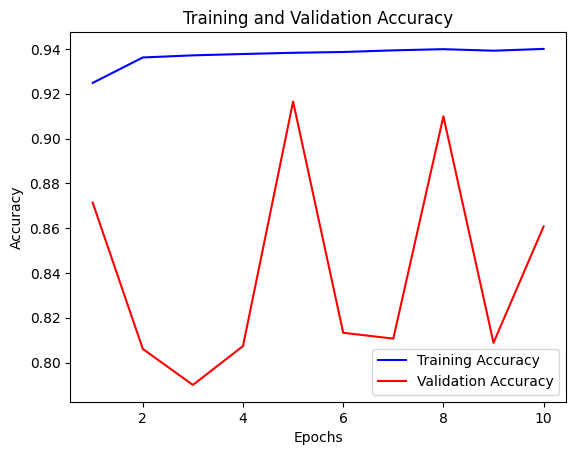

In [83]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object obtained from training your Keras model
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plotting accuracy vs validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(testX)


2573/2573 [==============================] - 7s 3ms/step


In [122]:
y_pred = np.squeeze(np.where(y_pred>0.5,1,0))

In [123]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [124]:
np.squeeze(Y_test.to_numpy())

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.squeeze(Y_test.to_numpy()), y_pred)


In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
res = model.evaluate(testX,Y_test)

2573/2573 [==============================] - 7s 3ms/step - loss: 20.6972 - accuracy: 0.5867


In [23]:
loss, acc = res

In [25]:
acc

0.5867099165916443

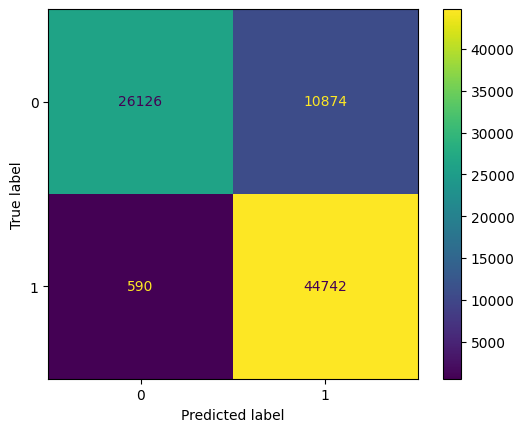

In [128]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

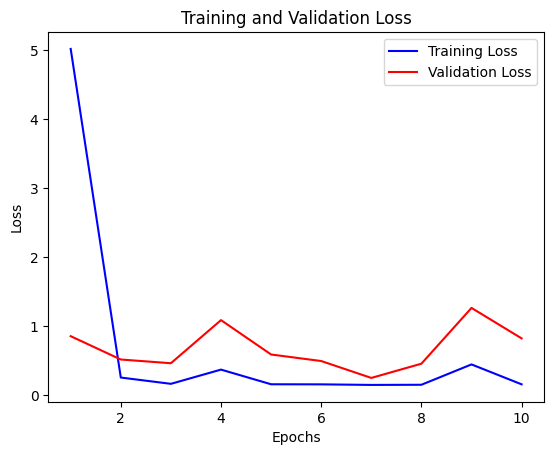

In [72]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object obtained from training your Keras model
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting loss vs validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [52]:
testX['state'].unique()

array(['1', '0', '4', '2', '5', 'CLO', 1, 2, 4], dtype=object)

In [53]:
# testX['state'].unique()
testX['state'] = 0

In [39]:
testX.dtypes

dur                  float64
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
stcpb                float64
dtcpb                float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
response_body_len    float64
is_sm_ips_ports      float64
proto                  int64
service                int64
state                 object
service                int64
sttl                   int64
dttl                   int64
swin                   int64
dwin                   int64
trans_depth            int64
ct_ftp_cmd             int64
is_ftp_login           int64
ct_srv_src    

In [ ]:
model.predict(trainX)

In [ ]:
import numpy as np
np.unique(Y.to_numpy(),return_counts=True)

In [ ]:
# for test
traindata= pd.read_csv("./data/from_unsw_website/UNSW_NB15_testing-set.csv")
Test_X = traindata.iloc[:,1:44]
Test_Y = traindata.iloc[:,44:]
cat_Test_X = Test_X[['proto','service','state']].copy()
Test_X = Test_X.drop(['attack_cat','proto','service','state'],axis=1)
X_columns_without_cat = Test_X.columns
cat_Test_X = pd.get_dummies(cat_Test_X, columns=['proto','service','state']).astype('int')
Test_X = scaler.transform(Test_X)
Test_X = pd.DataFrame(Test_X,columns=X_columns_without_cat)
Test_X = pd.concat([Test_X,cat_Test_X],axis=1)